In [73]:
import json
import time
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy as sp
from pprint import pprint
import quandl
from config import api_key

In [74]:
# ZILLOW TEST

co_region_ids = [11093, 16846, 5519, 20793, 34781, 10181, 44515, 38992, 33334, 10574, 23984, 17545, 19055, 17163, 4592, 26213, 119842, 50547, 45470, 24634, 119404, 12834, 24367, 120381, 7811, 38807, 46297, 17755, 52003, 4548, 119221, 13759, 119157, 55662, 4197, 16865, 120317, 37852, 36384, 7507, 44909, 119469, 8471, 39098, 52230, 38324, 120500, 13288, 16394, 49882, 120020, 395432, 21854, 17754, 119632, 22800, 119114, 56787, 24366, 24665, 4960, 52196, 120107, 8179, 119390, 36867, 16729, 46104, 46323, 24170, 120333, 11824, 50963, 24590, 11751, 31633, 12042, 120074, 13856, 45936, 55580, 39666, 54425, 396043, 42203, 23185, 30476, 6510, 396035, 16589, 50328]

zd_all_colorado = quandl.get_table('ZILLOW/DATA', api_key=api_key, paginate=True, indicator_id="ZSFH", region_id=co_region_ids)
zd_all_colorado

,indicator_id,region_id,date,value
None,,,,
0,ZSFH,8471,2020-09-30,727300.0
1,ZSFH,8471,2020-08-31,723126.0
2,ZSFH,8471,2020-07-31,719329.0
3,ZSFH,8471,2020-06-30,694325.0
4,ZSFH,8471,2020-05-31,686852.0
...,...,...,...,...
25285,ZSFH,10181,1996-05-31,151106.0
25286,ZSFH,10181,1996-04-30,150695.0
25287,ZSFH,10181,1996-03-31,150008.0


In [75]:
zd_region_ids = quandl.get_table('ZILLOW/REGIONS', api_key=api_key, paginate=True, region_id=co_region_ids)
zd_region_ids

,region_id,region_type,region
None,,,
0,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...
1,8179,city,Bow Mar; CO; Denver-Aurora-Lakewood; Arapahoe ...
2,7811,city,Welby; CO; Denver-Aurora-Lakewood; Adams County
3,7507,city,Twin Lakes; CO; Denver-Aurora-Lakewood; Adams ...
4,6510,city,Pinecliffe; CO; Denver-Aurora-Lakewood; Gilpin...
...,...,...,...
86,11824,city,Hartsel; CO; Denver-Aurora-Lakewood; Park County
87,11751,city,Guffey; CO; Denver-Aurora-Lakewood; Park County
88,11093,city,Denver; CO; Denver-Aurora-Lakewood; Denver County


In [76]:
zillow_data_merged = pd.merge(zd_all_colorado, zd_region_ids, on="region_id")
zillow_data_merged

,indicator_id,region_id,date,value,region_type,region
0,ZSFH,8471,2020-09-30,727300.0,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...
1,ZSFH,8471,2020-08-31,723126.0,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...
2,ZSFH,8471,2020-07-31,719329.0,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...
3,ZSFH,8471,2020-06-30,694325.0,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...
4,ZSFH,8471,2020-05-31,686852.0,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...
...,...,...,...,...,...,...
25285,ZSFH,10181,1996-05-31,151106.0,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...
25286,ZSFH,10181,1996-04-30,150695.0,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...
25287,ZSFH,10181,1996-03-31,150008.0,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...
25288,ZSFH,10181,1996-02-29,149590.0,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...


In [77]:
zillow_data_merged = zillow_data_merged[["indicator_id", "region_id", "region_type", "region", "date", "value"]]
zillow_data_merged = zillow_data_merged.rename(columns={"indicator_id": "Indicator ID", 
                                                        "region_id": "Region ID", 
                                                        "region_type": "Region Type", 
                                                        "region": "Region Name", 
                                                        "date": "Date", 
                                                        "value": "Home Value"})

In [78]:
zillow_data_merged

,Indicator ID,Region ID,Region Type,Region Name,Date,Home Value
0,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-09-30,727300.0
1,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-08-31,723126.0
2,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-07-31,719329.0
3,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-06-30,694325.0
4,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-05-31,686852.0
...,...,...,...,...,...,...
25285,ZSFH,10181,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...,1996-05-31,151106.0
25286,ZSFH,10181,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...,1996-04-30,150695.0
25287,ZSFH,10181,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...,1996-03-31,150008.0
25288,ZSFH,10181,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...,1996-02-29,149590.0


In [90]:
zillow_data_merged["Date"]= pd.to_datetime(zillow_data_merged["Date"])

In [97]:
zillow_data = zillow_data_merged.loc[zillow_data_merged["Date"] > "2016-04-01"]
zillow_data

,Indicator ID,Region ID,Region Type,Region Name,Date,Home Value
0,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-09-30,727300.0
1,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-08-31,723126.0
2,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-07-31,719329.0
3,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-06-30,694325.0
4,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-05-31,686852.0
...,...,...,...,...,...,...
25042,ZSFH,10181,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...,2016-08-31,379876.0
25043,ZSFH,10181,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...,2016-07-31,376165.0
25044,ZSFH,10181,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...,2016-06-30,372501.0
25045,ZSFH,10181,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...,2016-05-31,369904.0


In [129]:
# solution to filter all rows containing "TX" found: https://www.xspdf.com/help/50818407.html
zillow_clean = zillow_data[~zillow_data["Region Name"].str.contains("TX")]
zillow_clean

,Indicator ID,Region ID,Region Type,Region Name,Date,Home Value
0,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-09-30,727300.0
1,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-08-31,723126.0
2,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-07-31,719329.0
3,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-06-30,694325.0
4,ZSFH,8471,city,Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...,2020-05-31,686852.0
...,...,...,...,...,...,...
25042,ZSFH,10181,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...,2016-08-31,379876.0
25043,ZSFH,10181,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...,2016-07-31,376165.0
25044,ZSFH,10181,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...,2016-06-30,372501.0
25045,ZSFH,10181,city,Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...,2016-05-31,369904.0


In [131]:
zillow_clean.to_csv("output_data/zillow_data.csv")

In [138]:
zillow_clean["Region Name"]

0        Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...
1        Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...
2        Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...
3        Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...
4        Larkspur; CO; Denver-Aurora-Lakewood; Douglas ...
                               ...                        
25042    Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...
25043    Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...
25044    Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...
25045    Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...
25046    Arvada; CO; Denver-Aurora-Lakewood; Jefferson ...
Name: Region Name, Length: 4860, dtype: object

In [154]:
zillow_clean_new = pd.concat(zillow_clean, zillow_clean["Region Name"].str.split('; ', expand=True), axis=1)


TypeError: concat() got multiple values for argument 'axis'

In [163]:
# Info found at: https://stackoverflow.com/questions/37600711/pandas-split-column-into-multiple-columns-by-comma
zillow_clean_new = pd.concat([zillow_clean,zillow_clean["Region Name"].str.split('; ', expand=True)], axis=1)

In [167]:
zillow_clean_new = zillow_clean_new.rename(columns={0: "City", 1: "State", 2: "Area", 3: "County"})
zillow_clean_data = zillow_clean_new.drop(columns={"Region Type", "Region Name"})

In [170]:
zillow_clean_data = zillow_clean_data[["Indicator ID", "Region ID", "Area", "City", "State", "County", "Date", "Home Value"]]

In [171]:
zillow_clean_data

,Indicator ID,Region ID,Area,City,State,County,Date,Home Value
0,ZSFH,8471,Denver-Aurora-Lakewood,Larkspur,CO,Douglas County,2020-09-30,727300.0
1,ZSFH,8471,Denver-Aurora-Lakewood,Larkspur,CO,Douglas County,2020-08-31,723126.0
2,ZSFH,8471,Denver-Aurora-Lakewood,Larkspur,CO,Douglas County,2020-07-31,719329.0
3,ZSFH,8471,Denver-Aurora-Lakewood,Larkspur,CO,Douglas County,2020-06-30,694325.0
4,ZSFH,8471,Denver-Aurora-Lakewood,Larkspur,CO,Douglas County,2020-05-31,686852.0
...,...,...,...,...,...,...,...,...
25042,ZSFH,10181,Denver-Aurora-Lakewood,Arvada,CO,Jefferson County,2016-08-31,379876.0
25043,ZSFH,10181,Denver-Aurora-Lakewood,Arvada,CO,Jefferson County,2016-07-31,376165.0
25044,ZSFH,10181,Denver-Aurora-Lakewood,Arvada,CO,Jefferson County,2016-06-30,372501.0
25045,ZSFH,10181,Denver-Aurora-Lakewood,Arvada,CO,Jefferson County,2016-05-31,369904.0


In [174]:
zillow_clean_data.to_csv("output_data/zillow_zsfh_clean.csv")

<AxesSubplot:xlabel='Date'>

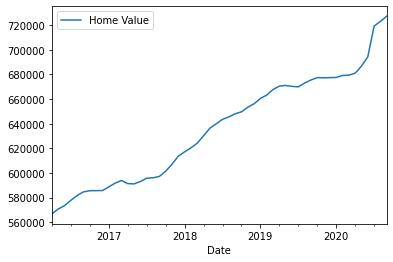

In [177]:
larkspur_df = zillow_clean_data.loc[zillow_clean_data["City"] == "Larkspur"]
larkspur_df.plot("Date", "Home Value")

In [ ]:

# quandl_url = f"https://www.quandl.com/api/v3/datatables/ZILLOW/DATA.json?"
# countdata = 0

# for index, row in zillow_home_value_df.iterrows():
#     region_id = row["Region ID"]
#     quandl_fetch = requests.get(quandl_url + f"region_id={region_id}" + f"&indicator_id=ZSFH&api_key={api_key}").json()
#     print(region_id)
# #     region_id = quandl_fetch["datatable"]["data"][countdata][1]
# #         indicator_id = quandl_fetch["datatable"]["data"][countdata][0]
# #         region_id = quandl_fetch["datatable"]["data"][countdata][1]
# #         date = quandl_fetch["datatable"]["data"][countdata][2]
# #         home_value = quandl_fetch["datatable"]["data"][countdata][3]
# #     print(region_id)